In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aluguel.csv')

In [3]:
df.head()

,id,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [17]:
df['animal'].unique()

array(['acept', 'not acept'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10611 entries, 0 to 10610
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10611 non-null  int64 
 1   city                 10611 non-null  object
 2   area                 10611 non-null  int64 
 3   rooms                10611 non-null  int64 
 4   bathroom             10611 non-null  int64 
 5   parking spaces       10611 non-null  int64 
 6   floor                10611 non-null  object
 7   animal               10611 non-null  object
 8   furniture            10611 non-null  object
 9   hoa (R$)             10611 non-null  int64 
 10  rent amount (R$)     10611 non-null  int64 
 11  property tax (R$)    10611 non-null  int64 
 12  fire insurance (R$)  10611 non-null  int64 
 13  total (R$)           10611 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 1.1+ MB


a) Construa um gráfico de relações pareadas que cruze as informações de número de quartos, número de banheiros, vagas de garagens e o total do aluguel. Pinte os dados pela cidade do imóvel. Responda: qual a cidade tem o aluguel mais caro para um imóvel de um quarto?

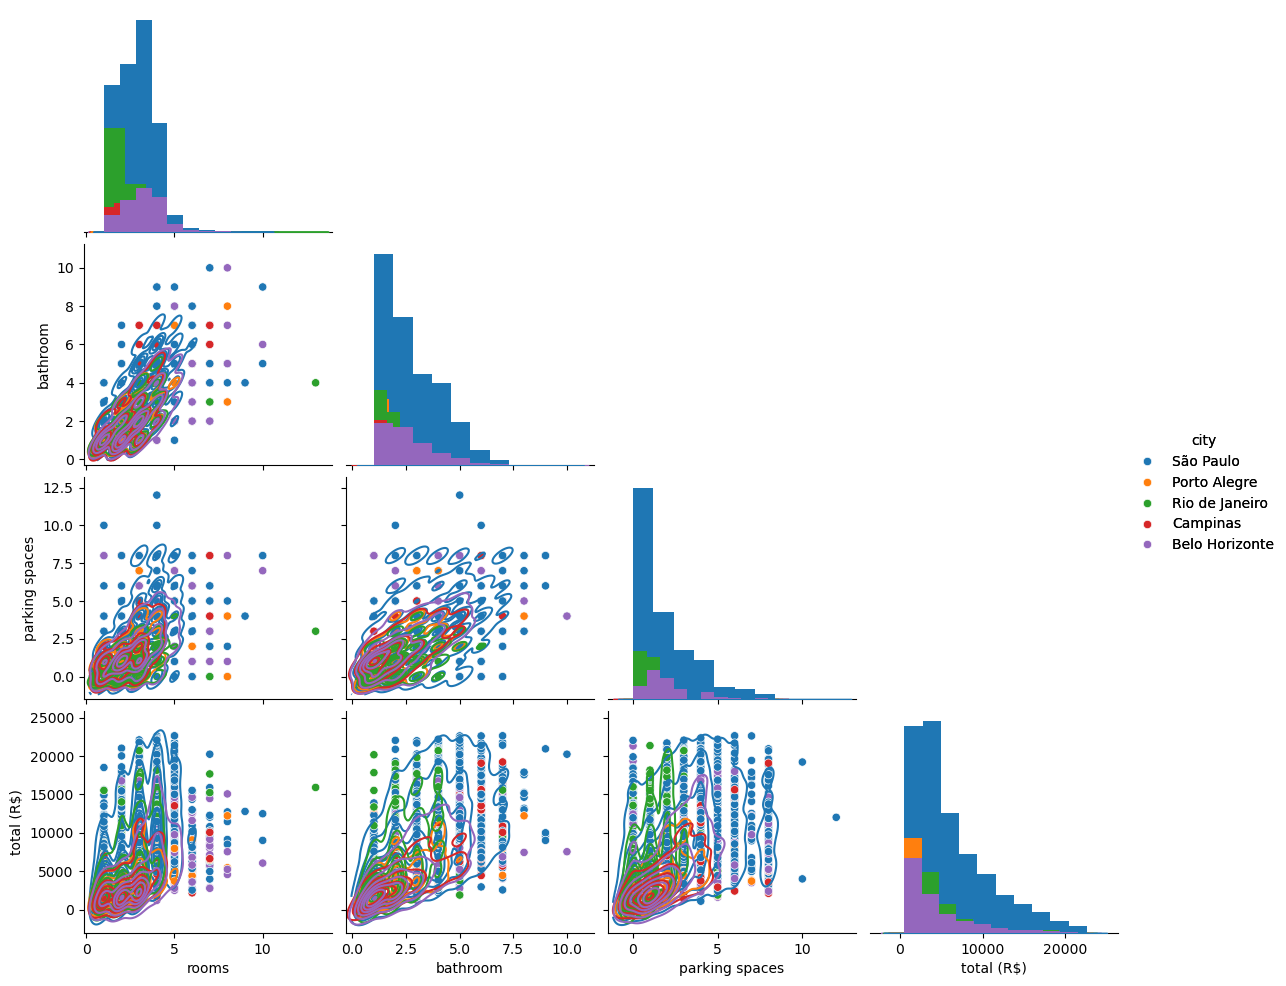

In [26]:
#df_plot = df[["city", "rooms", "bathroom", "parking spaces", "total (R$)"]].copy()
#df_plot.columns = ["Cidade", "Quartos", "Banheiros", "Garagem", "Aluguel Total"]

# Converter 'Aluguel Total' para numérico (caso esteja como string com símbolos)
df["total (R$)"] = pd.to_numeric(df["total (R$)"], errors="coerce")

# Gráfico de relações pareadas
grid = sns.pairplot(data=df, vars=["rooms", "bathroom", "parking spaces", "total (R$)"], hue="city", corner=True)

grid = grid.map_upper(plt.scatter)
grid = grid.map_diag(plt.hist)
grid = grid.map_lower(sns.kdeplot).add_legend()

#plt.suptitle("Relações entre variáveis de imóveis por cidade", y=1.02)
#plt.show()

In [6]:
# Encontrar cidade com o aluguel mais caro para imóvel de 1 quarto
um_quarto = df[df["rooms"] == 1]
mais_caro = um_quarto.loc[um_quarto["total (R$)"].idxmax()]

print("Cidade com aluguel mais caro para imóvel de 1 quarto:", mais_caro["city"])
print("Valor do aluguel:", mais_caro["total (R$)"])

Cidade com aluguel mais caro para imóvel de 1 quarto: São Paulo
Valor do aluguel: 18500


b) Construa um gráfico facetado por cidade mapeando o número de quartos que cada cidade tem. Use como visualização dos sugráficos a classe sns.countplot. Em seguida, identifique a quantidade de quartos mais frequente nos apartamentos disponíveis em cada uma das cidades.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


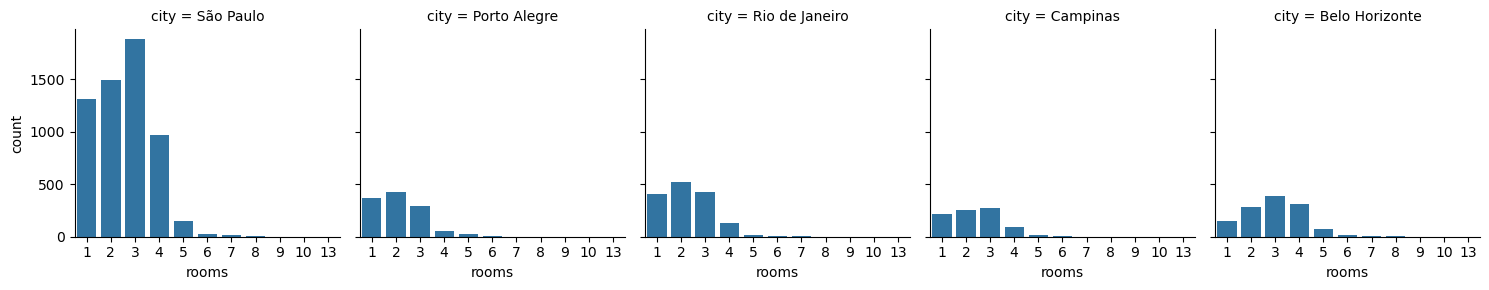

In [12]:
 facet = sns.FacetGrid(df, col="city")
 facet.map(sns.countplot, "rooms")

c) Construa um gráfico facetado pelas cidades (colunas) e pela variável animal (linhas) com a distribuição do valor total do aluguel. Há alguma cidade onde o fato de o condomínio aceitar animais afeta o preço do aluguel?

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\Lib\site

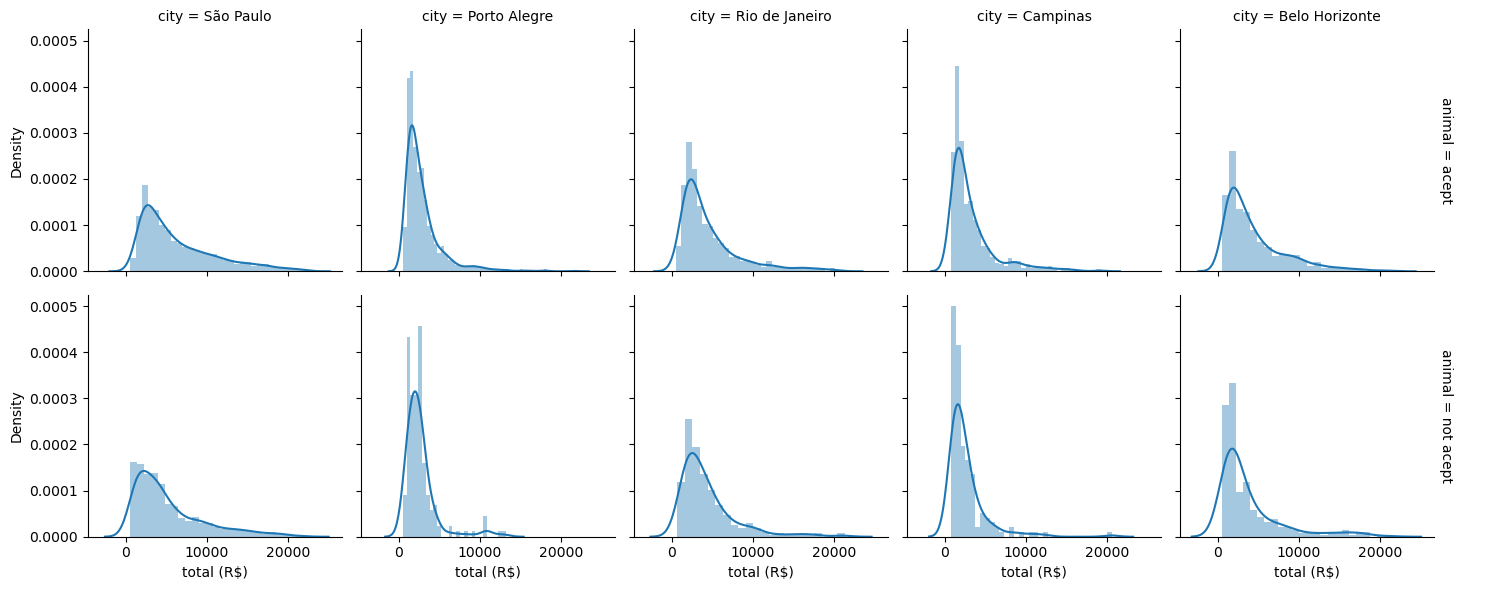

In [16]:
facet = sns.FacetGrid(df, row="animal", col="city", margin_titles=True)

facet.map(sns.distplot, "total (R$)").add_legend()

Não, inclusive quase todas as cidades têm uma diminuição no valor do aluguel, com a coluna "animal" com a variavel como aceita